[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package 

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    | 

inflation	89
rate	73
market	52
policy	42
remained	41
federal	32
economic	32
price	31
growth	27
november	26
continued	25
pace	24
october	24
outlook	24
labor	24
credit	23
period	21
monetary	21
risk	20
increase	20


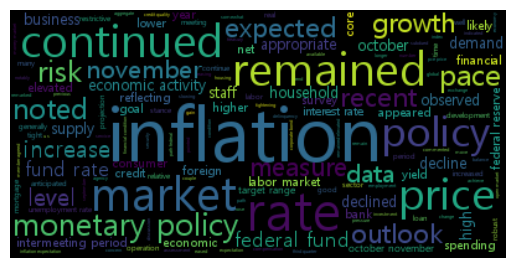

In [6]:
# pdf 파일을 바로 텍스트 마이닝하게끔 만들려 했으나 pdf 파일 인코딩 과정이 상당히 까다로워 현재로서는 txt 파일로 분석
# 번거롭더라도 txt 파일로 변환 후 돌려야 함

import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

with open("./text mining/2022-12-13_FOMC.txt", 'r', encoding='utf8') as f:
    content = f.read()
    
cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',content) # 문장단위로 끊기
cleaned_content = cleaned_content.lower()   # 소문자화
word_tokens = nltk.word_tokenize(cleaned_content) # tokenization
tokens_pos = nltk.pos_tag(word_tokens) #품사 분리

# 특정 품사만 추출하기
words = []
for word, pos in tokens_pos:
    if 'NN' in pos: # 명사
        words.append(word)
    elif 'VB' in pos: # 동사
        words.append(word)
    elif 'JJ' in pos: # 형용사
        words.append(word)
    elif 'RB' in pos: # 부사
        words.append(word)

# 단어의 원형을 찾아 같은 의미의 단어 토큰들을 하나의 값으로 인지하게끔 만들기
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

final_NN_words = lemmatized_words

# 불용어 제거

stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

# 직접 만든 불용어 사전, 사실 txt 파일로 정리해놓는게 바람직
customized_stopwords = ['be', 'is', 'are', "it’s", "don’t", "have", "percent", "month", "ha" ,"had", "wa", "committee", "participant"] 

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
k = 20

# 상위 20개 단어를 표 형태로 출력하기 위한 작성한 코드
word_count = []  
for word, freq in c.items():
    word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

for word, freq in word_count[:20]:
    print(word + "\t" + str(freq))

# 상위 20개 단어를 도식화하기 위해 작성한 코드    
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

text = ''
for word in final_NN_words:
    text = text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package 

inflation	90
price	45
food	29
year	26
energy	20
rate	17
increase	15
high	13
pce	13
market	12
last	12
good	12
service	11
measure	11
core	11
recent	10
index	10
housing	10
target	9
labor	9


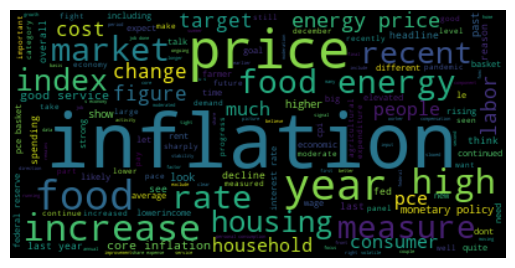

In [7]:
# 코드 효율화 버전

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import glob 

nltk.download('all')
def process_file(filepath, stopwords):
    with open(filepath, 'r', encoding='utf8') as f:
        content = f.read()

    # Clean and tokenize content
    cleaned_content = re.sub(r'[^\.\?\!\w\d\s]', '', content)  # Remove non-sentence-ending characters
    cleaned_content = cleaned_content.lower()  # Convert to lowercase
    word_tokens = word_tokenize(cleaned_content)  # Tokenize

    # Tag parts of speech
    tokens_pos = nltk.pos_tag(word_tokens)

    # Extract nouns, verbs, adjectives, and adverbs
    words = []
    for word, pos in tokens_pos:
        if pos.startswith(('NN', 'VB', 'JJ', 'RB')):
            words.append(word)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Remove stopwords
    final_words = [word for word in lemmatized_words if word not in stopwords]

    return final_words

def plot_wordcloud(text):
    # Generate wordcloud
    wordcloud = WordCloud().generate(text)
    
    # Plot wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def print_top_k(counter, k):
    # Print top k words
    top_k = counter.most_common(k)
    for word, freq in top_k:
        print(f"{word}\t{freq}")

# Load stopwords
stopwords_nltk = set(stopwords.words('english'))
custom_stopwords = ['be', 'is', 'are', "it’s", "don’t", "have", "percent", "month", "ha" ,"had", "wa", "committee", "participant"]
stopwords_final = stopwords_nltk.union(custom_stopwords)

# Process file
final_words = process_file("./text mining/2023-02-08_Waller.txt", stopwords_final)

# Count words
counter = Counter(final_words)

# Print top 20 words
print_top_k(counter, 20)

# Plot wordcloud
text = ' '.join(final_words)
plot_wordcloud(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


inflation	383
rate	151
policy	137
price	123
market	97
year	89
labor	86
monetary	85
growth	85
supply	75
participant	70
federal	65
high	60
increase	60
level	59
economic	59
service	57
core	57
recent	56
month	55


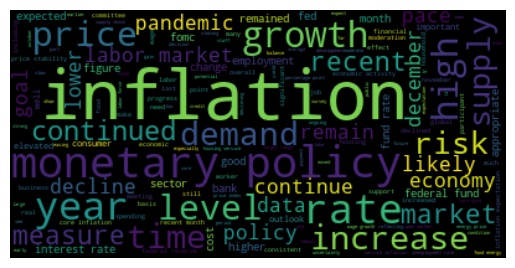

In [8]:
#  폴더 안에 있는 파일들을 다 합쳐서 분석

import nltk
import re
import glob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def process_file(filepath, stopwords):
    with open(filepath, 'r', encoding='utf8') as f:
        content = f.read()

    # Clean and tokenize content
    cleaned_content = re.sub(r'[^a-zA-Z0-9\s]', '', content)  # Remove non-alphanumeric characters
    cleaned_content = cleaned_content.lower()  # Convert to lowercase
    word_tokens = word_tokenize(cleaned_content)  # Tokenize

    # Remove stopwords
    final_words = [word for word in word_tokens if word not in stopwords]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in final_words]

    # Filter words based on part of speech
    words = []
    pos_tags = nltk.pos_tag(lemmatized_words)
    for word, pos in pos_tags:
        if pos.startswith(('NN', 'VB', 'JJ', 'RB')):
            words.append(word)

    return words

# Load stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stopwords_nltk = set(stopwords.words('english'))
custom_stopwords = ['be', 'is', 'are', "it’s", "don’t", "have", "percent", "month", "ha", "had", "wa", "committee", "participant"]
stopwords_final = stopwords_nltk.union(custom_stopwords)

# List of file paths to process
folder_path = './text mining'
filepath = glob.glob(folder_path + '/*.txt')

# Process files
final_words = []
for path in filepath:
    final_words.extend(process_file(path, stopwords_final))

# Count words
counter = Counter(final_words)

# Print top 20 words
print_top_k(counter, 20)

# Plot wordcloud
text = ' '.join(final_words)
plot_wordcloud(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


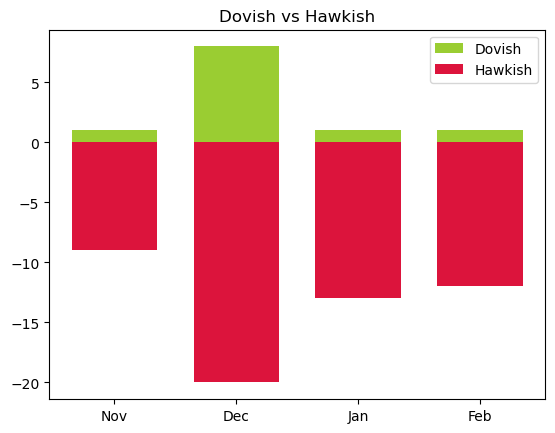

In [9]:
# 월별로 Dovish, Hawkish 분류하여 분석()

import nltk
import glob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import os
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def process_file(path, stop_words):
    with open(path, 'r', encoding='utf8' ) as file:
        text = file.read()
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return filtered_words

def classify_text(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Your criteria for classification
    group1_keywords = ['eased', 'weak', 'weaken', 'disinflation']
    group2_keywords = ['strengthen', 'solid', 'tight', 'rapid', 'strongly', 'strong', 'reflation']

    group1_count = 0
    group2_count = 0
    for word in filtered_words:
        if word.lower() in group1_keywords:
            group1_count += 1
        elif word.lower() in group2_keywords:
            group2_count += 1

    return group1_count, group2_count

# Folder path containing text files
folder_path = './text mining'

# Get the list of files
filepaths = glob.glob(os.path.join(folder_path, "*.txt"))

# Get the months from the file names
months = []
for file_path in filepaths:
    try:
        file_name = os.path.basename(file_path)
        file_month = datetime.datetime.strptime(file_name.split('_')[0], '%Y-%m-%d').strftime('%b')
        months.append(file_month)
    except ValueError:
        print(f'File name {file_name} is not in the correct format.')

# Process files
final_words = []
group1_count_total = defaultdict(int)
group2_count_total = defaultdict(int)
for i, path in enumerate(filepaths):
    filtered_words = process_file(path, stop_words)
    group1_count, group2_count = classify_text(' '.join(filtered_words))
    group1_count_total[months[i]] += group1_count
    group2_count_total[months[i]] += group2_count

# Plot the bar graph
x = range(len(group1_count_total))

fig, ax = plt.subplots()
ax.bar(x, group1_count_total.values(), width=0.7, color='yellowgreen', label='Dovish')
ax.bar(x, [-value for value in list(group2_count_total.values())], width=0.7, color='crimson', label='Hawkish')

ax.set_xticks(x)
ax.set_xticklabels(group1_count_total.keys())

ax.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('Dovish vs Hawkish')

plt.show()
       

{'Nov': 0.1, 'Dec': 0.2857142857142857, 'Jan': 0.07142857142857142, 'Feb': 0.07692307692307693}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


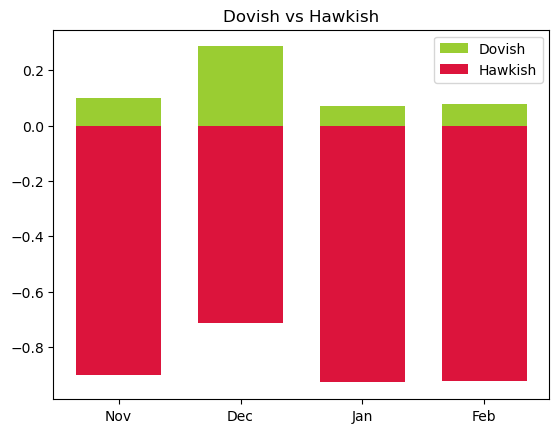

In [10]:
# 월별로 Dovish, Hawkish 분류하여 분석(상대적 비율)

import nltk
import glob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import os
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def process_file(path, stop_words):
    with open(path, 'r', encoding='utf8' ) as file:
        text = file.read()
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return filtered_words

def classify_text(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Your criteria for classification
    group1_keywords = ['eased', 'weak', 'weaken', 'disinflation']
    group2_keywords = ['strengthen', 'solid', 'tight', 'rapid', 'strongly', 'strong', 'reflation']

    group1_count = 0
    group2_count = 0
    for word in filtered_words:
        if word.lower() in group1_keywords:
            group1_count += 1
        elif word.lower() in group2_keywords:
            group2_count += 1

    return group1_count, group2_count

# Folder path containing text files
folder_path = './text mining'

# Get the list of files
filepaths = glob.glob(os.path.join(folder_path, "*.txt"))

# Get the months from the file names
months = []
for file_path in filepaths:
    try:
        file_name = os.path.basename(file_path)
        file_month = datetime.datetime.strptime(file_name.split('_')[0], '%Y-%m-%d').strftime('%b')
        months.append(file_month)
    except ValueError:
        print(f'File name {file_name} is not in the correct format.')

# Process files
final_words = []
group1_count_total = defaultdict(int)
group2_count_total = defaultdict(int)
for i, path in enumerate(filepaths):
    filtered_words = process_file(path, stop_words)
    group1_count, group2_count = classify_text(' '.join(filtered_words))
    group1_count_total[months[i]] += group1_count
    group2_count_total[months[i]] += group2_count

total_count = {}
relative_weights_group1 = {}
relative_weights_group2 = {}
for month in group1_count_total.keys():
    total_count[month] = group1_count_total[month] + group2_count_total[month]
    relative_weights_group1[month] = group1_count_total[month] / total_count[month]
    relative_weights_group2[month] = group2_count_total[month] / total_count[month]

months_list = list(group1_count_total.keys())


print(relative_weights_group1)

# Plot the bar graph
x = range(len(months_list))

fig, ax = plt.subplots()
ax.bar(x, [relative_weights_group1[month] for month in months_list], width=0.7, color='yellowgreen', label='Dovish')
ax.bar(x, [-relative_weights_group2[month] for month in months_list], width=0.7, color='crimson', label='Hawkish')

ax.set_xticks(x)
ax.set_xticklabels(months_list)

ax.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('Dovish vs Hawkish')

plt.show()